##### Airbnb, Inc. operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. It is based in San Francisco, California. The platform is accessible via website and mobile app             -- Wikipedia

##### Data Source ---  Inside Airbnb:http://insideairbnb.com/get-the-data.html

In [610]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from datetime import datetime
from re import sub
from statistics import median
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

In [611]:
data = pd.read_csv('listings (5).csv')
pd.set_option('display.max_columns', len(data.columns))
pd.set_option('display.max_rows', 100)
data.head()

id                       listing_url     scrape_id last_scraped  \
0  177  https://www.airbnb.com/rooms/177  2.020000e+13    2/28/2021   
1  360  https://www.airbnb.com/rooms/360  2.020000e+13    2/28/2021   
2  364  https://www.airbnb.com/rooms/364  2.020000e+13    2/27/2021   
3  590  https://www.airbnb.com/rooms/590  2.020000e+13    2/28/2021   
4  592  https://www.airbnb.com/rooms/592  2.020000e+13    2/28/2021   

                                                name  \
0   Tiny Home in the Heart of the City- ECO FRIENDLY   
1  Sit in the Peaceful Garden of the Chickadee Co...   
2                Lodo / RiNo LOFT  via airport train   
3                  Comfortable  - and a great value!   
4                                            private   

                                         description  \
0  160 sq ft + 80 sq ft loft for sleeping, Sleeps...   
1  Enjoy the famous Colorado weather and unplug i...   
2  Modern 1,000 square foot loft in the heart of ...   
3  Large guest room in my home, where I also live...   
4  This room is in the basement.  It does not hav...   

                               neighborhood_overview  \
0  Quiet neighborhood next to park, creeks and bi...   
1  The cottage is located in the center of Lower ...   
2  Ten brewpubs within walking distance, two grea...   
3  I love the diversity of my neighborhood and it...   
4                                                NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/a1745ab2-b3a0...      615   
1  https://a0.muscache.com/pictures/monet/Select-...      666   
2  https://a0.muscache.com/pictures/11766413/a2c5...      783   
3  https://a0.muscache.com/pictures/110931/30991c...      933   
4  https://a0.muscache.com/pictures/110942/171dd0...      933   

                                host_url            host_name host_since  \
0  https://www.airbnb.com/users/show/615                  Joe   7/7/2008   
1  https://www.airbnb.com/users/show/666  Jennifer & Giovanni   7/8/2008   
2  https://www.airbnb.com/users/show/783                Jason  7/11/2008   
3  https://www.airbnb.com/users/show/933                 Jill  7/21/2008   
4  https://www.airbnb.com/users/show/933                 Jill  7/21/2008   

                     host_location  \
0  Denver, Colorado, United States   
1  Denver, Colorado, United States   
2  Denver, Colorado, United States   
3  Denver, Colorado, United States   
4  Denver, Colorado, United States   

                                          host_about host_response_time  \
0  I'm originally from Oklahoma, but have lived i...     within an hour   
1  We are artists and tinkerers.\r\n \r\nWe enjoy...     within an hour   
2  I travel pretty frequently, I spend a lot of t...                NaN   
3  I am friendly and I love meeting people from a...     within an hour   
4  I am friendly and I love meeting people from a...     within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0               100%                 100%                 t   
1               100%                  92%                 t   
2                NaN                  NaN                 f   
3               100%                  83%                 t   
4               100%                  83%                 t   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/905d6...   
1  https://a0.muscache.com/im/users/666/profile_p...   
2  https://a0.muscache.com/im/users/783/profile_p...   
3  https://a0.muscache.com/im/users/933/profile_p...   
4  https://a0.muscache.com/im/users/933/profile_p...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/905d6...                NaN   
1  https://a0.muscache.com/im/users/666/profile_p...                NaN   
2  https://a0.muscache.com/im/users/783/profile_p...        Five Points   
3  https://a0.muscache

### Data Cleansing
 Dropping text columns

In [612]:
Drop = ['id','listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 
        'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 
        'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 
        'host_neighbourhood', 'host_verifications', 'calendar_last_scraped',
        'host_acceptance_rate', 'neighbourhood_group_cleansed', 'license',
        'host_total_listings_count', 'calculated_host_listings_count', 
        'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
        'calculated_host_listings_count_shared_rooms', 'latitude', 'longitude', 
        'neighbourhood', 'has_availability', 'host_has_profile_pic', 'bathrooms', 'calendar_updated'
]
df = data.drop(Drop, axis=1)

In [613]:
df.isna().sum()

host_since                       3
host_response_time             367
host_response_rate             367
host_is_superhost                3
host_listings_count              3
host_identity_verified           3
neighbourhood_cleansed           0
property_type                    0
room_type                        0
accommodates                     0
bathrooms_text                   4
bedrooms                       207
beds                            17
amenities                        0
price                            0
minimum_nights                   0
maximum_nights                   0
minimum_minimum_nights           0
maximum_minimum_nights           0
minimum_maximum_nights           0
maximum_maximum_nights           0
minimum_nights_avg_ntm           0
maximum_nights_avg_ntm           0
availability_30                  0
availability_60                  0
availability_90                  0
availability_365                 0
number_of_reviews                0
number_of_reviews_lt

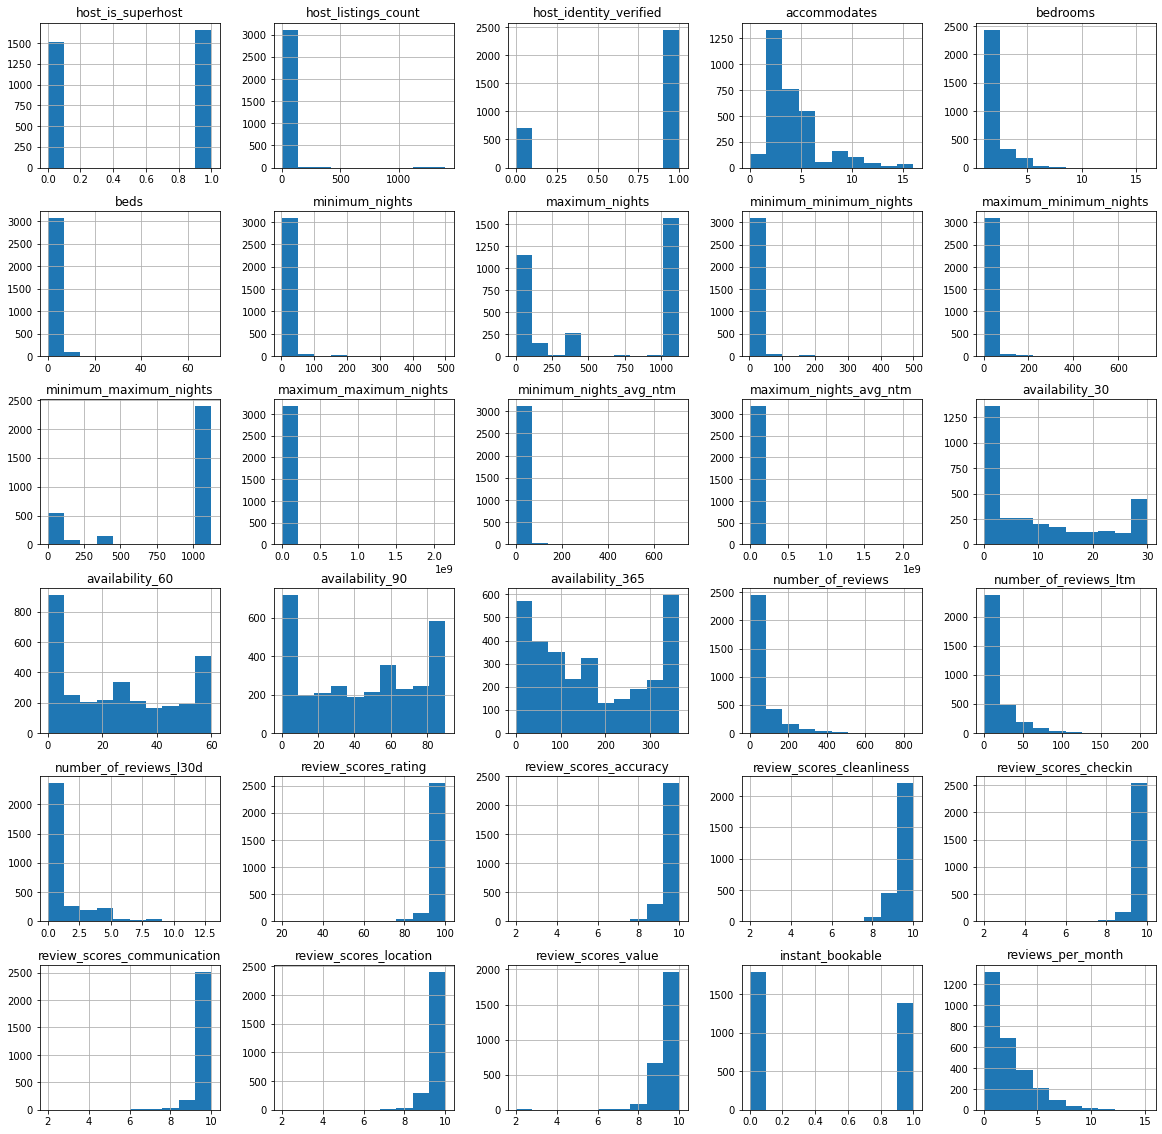

In [614]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

In [615]:
df.describe().round().transpose()

count      mean         std   min     25%  \
host_is_superhost            3171.0       1.0         0.0   0.0     0.0   
host_listings_count          3171.0      15.0       100.0   0.0     1.0   
host_identity_verified       3171.0       1.0         0.0   0.0     1.0   
accommodates                 3174.0       4.0         3.0   0.0     2.0   
bedrooms                     2967.0       2.0         1.0   1.0     1.0   
beds                         3157.0       2.0         2.0   0.0     1.0   
minimum_nights               3174.0      17.0        26.0   1.0     2.0   
maximum_nights               3174.0     614.0       517.0   1.0    30.0   
minimum_minimum_nights       3174.0      17.0        26.0   1.0     2.0   
maximum_minimum_nights       3174.0      19.0        42.0   1.0     2.0   
minimum_maximum_nights       3174.0     876.0       442.0   1.0  1125.0   
maximum_maximum_nights       3174.0  677481.0  38117659.0   1.0  1125.0   
minimum_nights_avg_ntm       3174.0      19.0        42.0   1.0     2.0   
maximum_nights_avg_ntm       3174.0  675945.0  38031420.0   1.0  1125.0   
availability_30              3174.0      10.0        11.0   0.0     0.0   
availability_60              3174.0      25.0        21.0   0.0     3.0   
availability_90              3174.0      44.0        32.0   0.0    12.0   
availability_365             3174.0     169.0       125.0   0.0    58.0   
number_of_reviews            3174.0      58.0        87.0   0.0     3.0   
number_of_reviews_ltm        3174.0      15.0        21.0   0.0     1.0   
number_of_reviews_l30d       3174.0       1.0         2.0   0.0     0.0   
review_scores_rating         2762.0      97.0         6.0  20.0    96.0   
review_scores_accuracy       2741.0      10.0         1.0   2.0    10.0   
review_scores_cleanliness    2741.0      10.0         1.0   2.0    10.0   
review_scores_checkin        2741.0      10.0         0.0   2.0    10.0   
review_scores_communication  2741.0      10.0         1.0   2.0    10.0   
review_scores_location       2741.0      10.0         0.0   2.0    10.0   
review_scores_value          2741.0      10.0         1.0   2.0     9.0   
instant_bookable             3174.0       0.0         0.0   0.0     0.0   
reviews_per_month            2770.0       2.0         2.0   0.0     1.0   

                                50%     75%           max  
host_is_superhost               1.0     1.0  1.000000e+00  
host_listings_count             1.0     3.0  1.398000e+03  
host_identity_verified          1.0     1.0  1.000000e+00  
accommodates                    4.0     5.0  1.600000e+01  
bedrooms                        1.0     2.0  1.600000e+01  
beds                            2.0     3.0  7.000000e+01  
minimum_nights                  3.0    30.0  5.000000e+02  
maximum_nights                700.0  1125.0  1.125000e+03  
minimum_minimum_nights          3.0    30.0  5.000000e+02  
maximum_minimum_nights          4.0    30.0  7.300000e+02  
minimum_maximum_nights       1125.0  1125.0  1.125000e+03  
maximum_maximum_nights       1125.0  1125.0  2.147484e+09  
minimum_nights_avg_ntm          4.0    30.0  7.120000e+02  
maximum_nights_avg_ntm       1125.0  1125.0  2.142625e+09  
availability_30                 5.0    18.0  3.000000e+01  
availability_60                24.0    44.0  6.000000e+01  
availability_90                47.0    73.0  9.000000e+01  
availability_365              148.0   300.0  3.650000e+02  
number_of_reviews              22.0    76.0  8.510000e+02  
number_of_reviews_ltm           5.0    21.0  2.100000e+02  
number_of_reviews_l30d          0.0     2.0  1.300000e+01  
review_scores_rating           98.0   100.0  1.000000e+02  
review_scores_accuracy         10.0    10.0  1.000000e+01  
review_scores_cleanliness      10.0    10.0  1.000000e+01  
review_scores_checkin          10.0    10.0  1.000000e+01  
review_scores_communication    10.0    10.0  1.000000e+01  
review_scores_location         10.0    10.0  1.000000e+01  
review_scores_value     

In [616]:
df.shape

(3174, 41)

### Run a correlation heatmap using Seaborn 

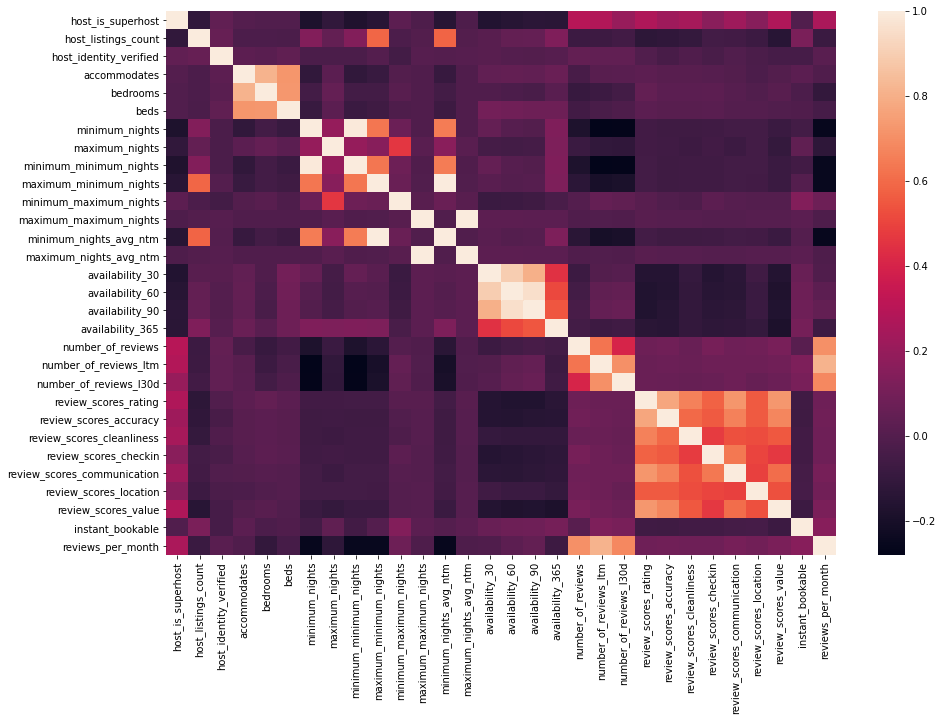

In [617]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr());
plt.show()

### Find the Min, Max, Med and STD of the listing price

In [618]:
# Fill null data with 0
data1 = df.fillna(0)

# Shuffle data and redo index
data1 = df.sample(frac=1).reset_index(drop=True)

# Rank Arbnb listing prices in order of least to max
priceTemp = []
for index, row in df.iterrows():
    priceTemp.append( float(sub(r'[^\d.]', '', row['price'])) )
priceTemp.sort()
print("Total Initial Data:", len(data))
print("Highest Price in Original Data:", max(priceTemp))

Total Initial Data: 3174
Highest Price in Original Data: 9999.0


In [619]:
# Get basic data statistics
dataPriceList = []
for index, row in df.iterrows():
    dataPriceList.append(float(sub(r'[^\d.]', '', row['price'])))
print("Min:", min(dataPriceList))
print("Max:", max(dataPriceList))
print("Mean:", np.mean(dataPriceList))
print("Median:", median(dataPriceList))
print("STD:", np.std(dataPriceList))

Min: 0.0
Max: 9999.0
Mean: 153.2189666036547
Median: 104.0
STD: 267.68421379867834


### List of amenities and see how they influence the listing prices (which amenity are important to customers)

In [620]:
def getAmenityList(datum):
    
    amenityList = set()
    amenityAvgPrice = defaultdict(float)
    amenityCount = defaultdict(int)
    for index, row in datum.iterrows():
        price = float(sub(r'[^\d.]', '', row['price']))
        amenities = set(row['amenities'].replace('"', "").replace('{', "").replace('}', "").split(','))
        for amenity in amenities:
            if "translation missing" not in amenity and amenity != '':
                amenityList.add( amenity )
                amenityCount[amenity] += 1
                amenityAvgPrice[amenity] += price
    amenityList = list(amenityList)
    
    for amenity in amenityAvgPrice:
        amenityAvgPrice[amenity] = amenityAvgPrice[amenity] / amenityCount[amenity]
    
    # Sort amenity based on average price (descending order)
    amenitySortedByAvgPrice = [[amenityAvgPrice[amenity], amenity] for amenity in amenityAvgPrice]
    amenitySortedByAvgPrice.sort()
    amenitySortedByAvgPrice.reverse()
    
    # Graph top 20 expensive amenities
    avgPrice = [(amenity[0]) for amenity in amenitySortedByAvgPrice[:20]]
    amenities = [(amenity[1]) for amenity in amenitySortedByAvgPrice[:20]]
    
    # Label graph
    plt.barh(np.arange(len(amenities)), list(reversed(avgPrice)), align='center', alpha=0.5)
    plt.yticks(np.arange(len(amenities)), list(reversed(amenities)))
    plt.xlim(xmin=80)
    plt.xlabel("Average AirBnB Price/Night in Denver")
    plt.ylabel("Amenities")
    plt.title("Amenity Correlation To Pricing")
    plt.show()

    return amenityList

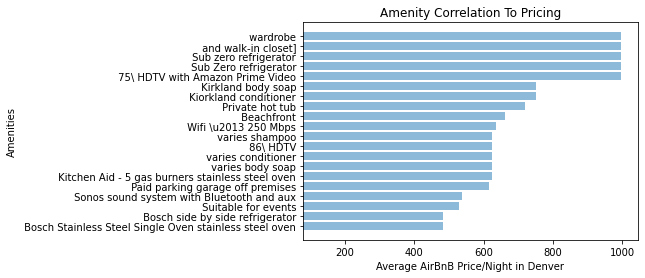

In [621]:
amenityList = getAmenityList(data)

#### Data cleansing for Time Series Analysis and Future Price Prediction

In [622]:
data['price'] = data['price'].apply(lambda x: float(x[1:-3].replace(',','')))

In [623]:
Drop = ['id','listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'host_since', 
        'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'amenities', 'instant_bookable',
        'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_is_superhost',
        'host_neighbourhood', 'host_verifications', 'calendar_last_scraped', 'host_has_profile_pic',
        'host_acceptance_rate', 'neighbourhood_group_cleansed', 'license', 'host_identity_verified', 'last_review',
        'host_total_listings_count', 'calculated_host_listings_count', 'host_response_time', 'neighbourhood_cleansed',
        'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'bathrooms_text', 
        'calculated_host_listings_count_shared_rooms', 'latitude', 'longitude', 'host_response_rate', 'first_review',
        'neighbourhood', 'has_availability', 'host_has_profile_pic', 'bathrooms', 'calendar_updated', 'property_type','room_type',
        'review_scores_value', 'review_scores_location','review_scores_communication', 'review_scores_checkin', 'review_scores_cleanliness',
        'review_scores_accuracy', 'review_scores_rating','reviews_per_month' ,'bedrooms','beds','host_listings_count'

]
df2 = data.drop(Drop, axis=1)

In [624]:
df2.shape

(3174, 17)

## Price Distribution

In [625]:
print(f"Price per Night range from ${min(df2.price)} to ${max(df2.price)}.")

Price per Night range from $0.0 to $9999.0.


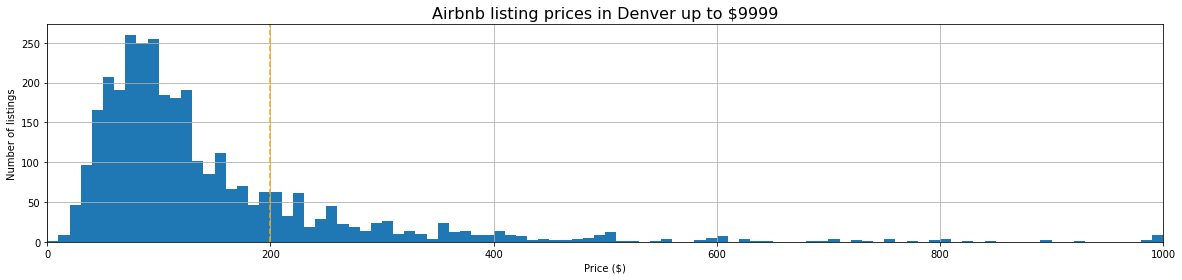

In [626]:
# Distribution of prices from £0 to £1000
plt.figure(figsize=(20,4))
df2.price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.title("Airbnb listing prices in Denver up to $9999", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

#### Room type vs Price range
#### Based on the Graph below, renting out the entire house would be the best option.

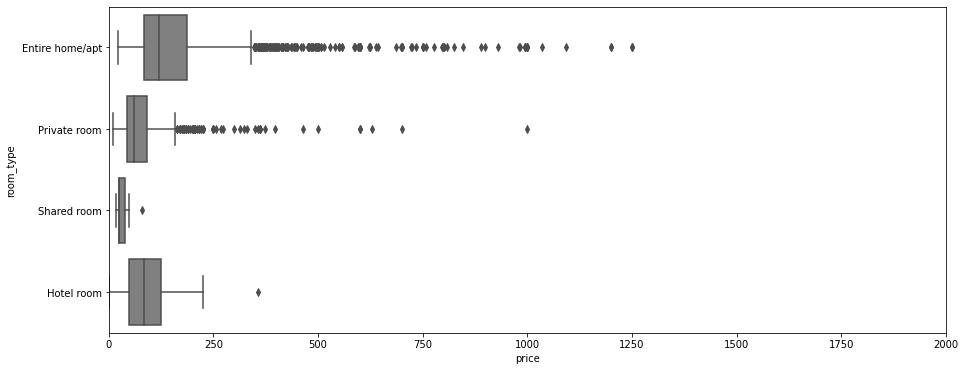

In [627]:
plt.figure(figsize = (15,6))
sns.boxplot(x = 'price', y = 'room_type', data = data, color = 'grey')
plt.xlim(0,2000);

## Time Series Analysis

In [628]:
# Converting to datetime
data.host_since = pd.to_datetime(data.host_since)
data.first_review = pd.to_datetime(data.first_review)
print(f"Of the Airbnb hosts that are still listing on the site, the first joined on {min(data.host_since).strftime('%d %B %Y')}, and the most recent joined on {max(data.host_since).strftime('%d %B %Y')}.")

Of the Airbnb hosts that are still listing on the site, the first joined on 07 July 2008, and the most recent joined on 17 February 2021.


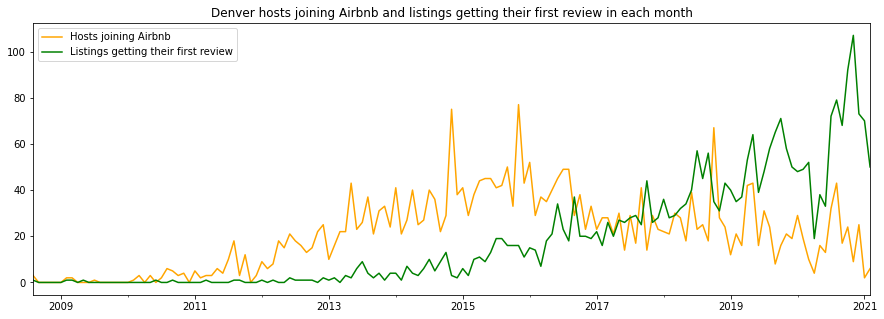

In [629]:
plt.figure(figsize=(15,5))
data.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='orange')
data.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='green')
plt.title('Denver hosts joining Airbnb and listings getting their first review in each month')
plt.legend()
plt.xlim('2008-08-01', '2021-02-28')
plt.xlabel('')
plt.ylabel('')
plt.show()

C:\Users\linam\.conda\envs\PythonData\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\linam\.conda\envs\PythonData\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


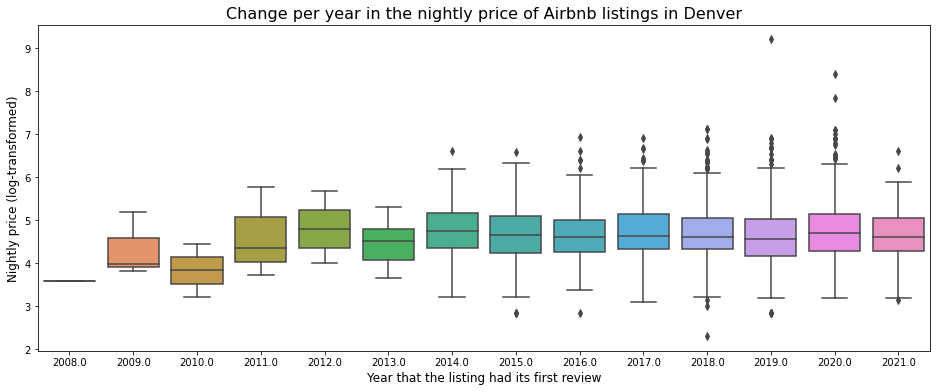

In [630]:
plt.figure(figsize=(16,6))
sns.boxplot(data.first_review.dt.year, np.log(data.price))
plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per year in the nightly price of Airbnb listings in Denver', fontsize=16)
plt.show()

In [631]:
X = df2.drop('price', axis=1)
y = df2.price

In [632]:
# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [633]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

### XGBoost Model

In [634]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

Time taken to run: 0.0 minutes

Training MSE: 733.5375
Validation MSE: 53242.4731

Training r2: 0.9907
Validation r2: -0.2496


In [635]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

weight
number_of_reviews_l30d  0.004958
maximum_minimum_nights  0.010075
minimum_nights_avg_ntm  0.014992
availability_90         0.019571
maximum_maximum_nights  0.019957
number_of_reviews_ltm   0.021151
number_of_reviews       0.023884
availability_30         0.043758
availability_365        0.048627
maximum_nights          0.048797
availability_60         0.059342
maximum_nights_avg_ntm  0.065519
minimum_nights          0.072447
accommodates            0.119520
minimum_minimum_nights  0.208245
minimum_maximum_nights  0.219157

#### The top 5 most important features are:

minimum_maximum_nights
minimum_minimum_nights
accommodates
minimum_nights
maximum_nights_avg_ntm

In [636]:
# test see if there are still null values

df2.isna().mean().sort_values(ascending = False)

number_of_reviews_l30d    0.0
maximum_maximum_nights    0.0
price                     0.0
minimum_nights            0.0
maximum_nights            0.0
minimum_minimum_nights    0.0
maximum_minimum_nights    0.0
minimum_maximum_nights    0.0
minimum_nights_avg_ntm    0.0
number_of_reviews_ltm     0.0
maximum_nights_avg_ntm    0.0
availability_30           0.0
availability_60           0.0
availability_90           0.0
availability_365          0.0
number_of_reviews         0.0
accommodates              0.0
dtype: float64

### Random Forest Regression Model

In [637]:
#Random forest fit

lm_model = RandomForestRegressor(max_depth = 9, random_state = 17)
lm_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=9, random_state=17)

In [638]:
pred_train = lm_model.predict(X_train)
pred_test = lm_model.predict(X_test)

In [639]:
def actual_vs_predicted(y_train,pred_train):

    
    results = pd.DataFrame(list(zip(y_train,pred_train)))
    results.columns = ['Actual','Fitted']
    results['Diff'] = results['Actual'] - results['Fitted']
    
    fig, ax = plt.subplots(1,3,figsize = (15,5))
    sns.regplot(x = 'Actual',y = 'Fitted', data = results,ax = ax[0])
    sns.distplot(results['Diff'],ax = ax[1])
    sns.regplot(x = 'Fitted',y = 'Diff', data = results,ax = ax[2])
    
    print("r2 Score: {:.2f}, MSE : {:.2f}".format(r2_score(y_train,pred_train), mean_squared_error(y_train,pred_train)))
    plt.show()
    
    return results

C:\Users\linam\.conda\envs\PythonData\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


r2 Score: 0.83, MSE : 13492.78


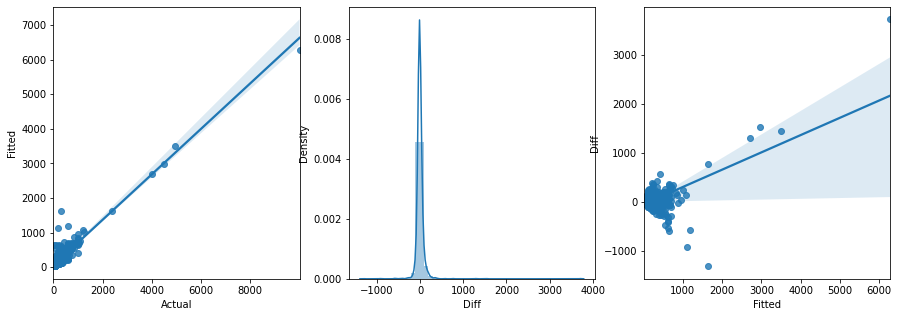

In [640]:
#Get predictions
pred_train = lm_model.predict(X_train)
pred_test = lm_model.predict(X_test)

#Train set Results
results = actual_vs_predicted(y_train,pred_train)

## Conclusions:

###### Airbnb average listing prices in Denver areas are in the range from $20 - $999
###### Cherry Creek is the most expensive listing areas.
###### Most common property types is lighthouse, we also found out listing entire house out will gain the most.
###### Walk-in Closet, Amazon Prime video, HDTV etc. amenities are seeming drive up the listing price.
###### If the owner is a Superhost or not, doesn’t seems affect listing price that much, as well as hosting years, Airbnb renters care about property features, locations more.
###### XGBoost and Random Forest Regression models give 83% R square score which means the independent variables can explain 83% of the dependent variable (Price).